# Исследование рынка заведений общественного питания Москвы

# Описание проекта

Планируется открыть небольшое заведение общетсвенного питания в Москве. Нужно изучить рынок общестенного питания на локальном рынке, предоставить результаты подходящие для инвесторов и дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения.
Датасет представляет собой набор данных содержащих название заведения общепита, итендификатор заведения, статус о принадлежности к сети, тип заведения, адрес заведения, количество посадочных мест.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat

## Подготовка данных

In [2]:
pd.options.display.max_colwidth = 100 

In [3]:
df = pd.read_csv("https://code.s3.yandex.net/datasets/rest_data.csv")

In [7]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [8]:
df.duplicated().sum() # Явных дубликатов нет

0

In [9]:
df.isna().sum() # Пропусков нет

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [10]:
for i in df['object_name'].unique(): # Проверяем на неявные дубликаты
    print(i)

СМЕТАНА
Родник
Кафе «Академия»
ПИЦЦЕТОРИЯ
Кафе «Вишневая метель»
СТОЛ. ПРИ ГОУ СОШ № 1051
Брусника
Буфет МТУСИ
КПФ СЕМЬЯ-1
Столовая МТУСИ
Пекарня 24
Гогиели
ШКОЛА 735
Алло Пицца
Гимназия 1542
Школа 1011
Суши Wok
Донер Кебаб
Тануки
Американская Лаборатория Десертов
Кафе
КАФЕ УЮТ
Долина Чайхона
ГБОУ Школа № 1411 (970)
Кафетерий
Домино'с Пицца
РАХИМКУЛОВА Т.Х.
СТОЛОВАЯ ПРИ ГУП ОБЪЕДИНЕННЫЙ КОМБИНАТ ШКОЛЬНОГО ПИТАНИЯ
ШКОЛА 1444
Мархал
Готика
Гимназия № 1527
Кафе «Хинкальная»
Рыба & мясо на углях
Кларом
Месопотамия
Му-Му
Хлеб насущный
TAJJ MAHAL
Калифорния Дайнер
Балалаечная
Пиросмани
ДАНКИН ДОНАТС
Вареничная №1
ШОКОЛАДНИЦА
IL Pizzaiolo
Теремок
Мосбург
Эрик Рыжий
Домашняя снедь
Хинкальная
ВОСТОЧНЫЙ КВАРТАЛ
ПОЧТМЕЙСТЕР
БОСФОР
Мастер
Шантимель
Буфет при Астраханских банях
Столовая при школе 2097
Столовая
БУФЕТ ШК.104
КАРЛ БАЛЕНГ
ГБОУ Школа № 1078
Старый дворик
Пивной погребок
ТАНУКИ
Паб «ШемроК»
ХуанХэ
Специализированный цех Магнолия
Кафе-бар Альбом
Шоколадница
МУ-МУ
Кальянный клуб Дымок Угол

Джандуя
Колледж сферы услуг № 44
Кафе «Ренессанс»
СТОЛОВАЯ ПРИ ГОУ СОШ № 1043
Столовая 1908
Стрелка
ГБОУ ШКОЛА №1998 ОАО «Комбинат дошкольного питания»
СТОЛОВАЯ ГЛАВНОГО ЦЕНТРА СПЕЦСВЯЗИ
БУФЕТ-РАЗДАТОЧНЫЙ ПРИ ШКОЛЕ 293
КАФЕ «ШЕФФИЛД»
Тажин
Бар Голова
Дарвин Паб
СТОЛОВАЯ 2 ЭТАЖ ФГУП РТРС
СТОЛОВАЯ БЦ «УЛЬТРАМАРИН»
Спорт-бар «Фортуна»
СТОЛОВАЯ ПРИ ОАО «КАЛИБР»
Кафе «Дилижанс»
СТОЛОВАЯ ЦЕНТРА «ЗУБАРЕВСКИЙ»
Кафе «Крошка-картошка»
КАФЕ ИП ЗЕЛЕНЫЙ А.Ю.
СТОЛОВАЯ ПРИ З-ДЕ МЭМРЗ
СТОЛОВАЯ при ВНИИЖТ
СТОЛОВАЯ ПРИ ГИМНАЗИИ МПС РФ
Столовая «ЛАНЧ ХОЛЛ»
WORLD CLASS кафе
OXUS
Ресторан в гостинице «Азимут»
Пауланер
495
Бар на 12 этаже
СТОЛОВАЯ ПРИ ГМПУ «РАДУГА»
БУФЕТ ФГБОУ ВО «РГСУ»
Пять звезд
Хаят
Столовая «ГУП ОРС МЕТРОПОЛИТЕН»
Ресторан «Прай Тайм»
СТОЛОВАЯ ГУП «Мосгортранс» 6-ГО ТРОЛЛЕЙБУСНОГО ПАРКА
РУС СЕРВИС
ХАНОЙ
СПОРТ-КАФЕ
Вкус Мяса
САЙГОН
БУФЕТ ПРИ СТАНЦИИ «АБРАМЦЕВСКАЯ»
Хинкали Gали
ЩЕРБАКОВА ЛЮДМИЛА АНАТОЛЬЕВНА
Щербакова Людмила Анатольевна
РАЙ
Кафе «Маргилан»
ОЗБИ
ПРОНТО
Ресторан Баку-Сити
Пи

Корейская кухня
Тайское мороженое, лимонады
Немецкая кухня
Хот доги
Сладкая вата, попкорн
Испанские пончики Чуррос
Пунк питания
Пункт питания
Бистро5
Столовая №15
Gotham lounge
Gold
Курочка с Нами
Столовая «Компотик»
Кровля
Кальянная «Abu Dhabi»
Булочная Фокина
Кальянная Garnet Loung
Бильярдный клуб 15-ый шар
Сармат
Кальянная Loft 24
Дон Хуан
Кафе въетнамской кухни «Фо стрит»
Джо кофе
Шиф кафе
Московская сеть кальянных МСК
Маэстро пицца
Starhit cafe
Кафе Руккола
Хлебная лавка
Мангал Хаус
Мята Кальянная
Coffeek
Паб
З-Д «КОМПРЕССОР»
Кофейня Тесто
Doner Хаус
Девятка
Кабак у Азера
Бильярдный клуб «Падишах»
Фермер Буфет
Пицца-Пи
Tea & Smoke
Mr Doodls
Коктейли Movenpick
Кафе «Бульон»
Кафе «Мегаполис»
Кафе- А-Ля-Карт
Price Coffee
Шаш Бургер
СТОЛОВАЯ ПРИ АО ВНИИЭТО
Советская столовая «Печки-лавочки»
Чудо печка
Кафе-буфет
ГП ШБС «ЛЮБЛИНО» ШК. 687
Донер, Выпечка
Кафе «Mavi»
Столовая циам им Баранова
Пират Пицца
Домашняя выпечка
Грузинская кухня ЭZО
Хинкальный Дом Мегобари
Кафе «Дагестанская лавк

Были обнаружены неявные дубликаты в названиях заведений. Их лучше исправить

In [11]:
df['object_name'] = df['object_name'].str.replace('ИЛЬ ПАТИО','Иль-патио' )
df['object_name'] = df['object_name'].str.replace('Prime Прайм стар','Prime Star' )
df['object_name'] = df['object_name'].str.replace('Праймстар','Prime Star' )
df['object_name'] = df['object_name'].str.replace('МясоROOB','Мясоroob' )
df['object_name'] = df['object_name'].str.replace('PRIME STAR Прайм стар','Prime Star' )
df['object_name'] = df['object_name'].str.replace('Vanwok Ванвок','Vanwok' )
df['object_name'] = df['object_name'].str.replace('Van Wok Ванвок','Vanwok' )
df['object_name'] = df['object_name'].str.replace('Лаундж-бар «Мята Lounge»','Мята Lounge' )
df['object_name'] = df['object_name'].str.replace('Бар Мята Lounge','Мята Lounge' )
df['object_name'] = df['object_name'].str.replace('Кальянная «Мята Lounge»','Мята Lounge' )
df['object_name'] = df['object_name'].str.replace('СТОЛОВАЯ при Ц С П С И Д ДОВЕРИЕ','Столовая при ЦСПСИД Доверие' )
df['object_name'] = df['object_name'].str.replace('СТОЛОВАЯ при Ц С П С И Д ДОВЕРИЕ','Столовая при ЦСПСИД Доверие' )

In [12]:
df['object_name'] = df['object_name'].str.capitalize().str.strip() # Приведем к единому регистру названия заведений, и уберем отступы впереди и после строк
df['address'] = df['address'].str.strip() # Уберем отступы впереди и после строк в адресах

In [13]:
df.query('number == 0').groupby('object_type')['id'].count()

object_type
бар                                   28
буфет                                 68
закусочная                           189
кафе                                 310
кафетерий                            113
магазин (отдел кулинарии)            145
предприятие быстрого обслуживания    704
ресторан                              45
столовая                              19
Name: id, dtype: int64

Можно увидеть, что есть заведения без посадочных мест. Это вряд ли ошибка так как скорее всего эти предприятия работают на вынос. Либо  их тип определен в базе не верно.

In [15]:
df.query('chain == "да"').groupby('object_name', as_index=False)['id'].count().query('id == 1')

,object_name,id
0,Beverly hills diner,1
1,Bierloga,1
2,Black & white,1
4,Boobo,1
5,Bubbleology,1
...,...,...
566,Якитория и спорт бар,1
567,Якитория и ян примус,1
568,Ямми микс,1
569,Ян примус,1


Можно увидеть, что для некоторых сетевых заведений указано только одно работающее заведение. Есть несколько вариантов почему  данные такие. Некоторые заведения действительно сети, но возможно не представлены в Москве более чем одним заведением. Beverly hills diner, например когда-то был сетью, но сейчас работает только один ресторан, такой сценарий возможен и с другими заведениями. Некоторые названия указаны не  совсем понятно и требуют уточнения. Например "Якитория и ян примус". Возможно они расположены в одном здании и при парсинге возникла ошибка, либо при занесении данных. Так или иначе количество подобных заведений не такое большое, чтобы исказить результаты исследования значительно, а исправить данные быстро трудоемко. 

<p><b>Вывод:</b>
<p>На этапе подготовки данных была проведена проверка на соответствие данных подходящим типам, на наличие пропусков и дубликатов. В результате были обнаружены и исправлены неявные дубликаты, приведены к единому регистру названия заведений, убраны отступы в названиях заведений и адресах  

## Анализ данных

 ### Сотношение видов объектов общественного питания по количеству

In [16]:
object_type_group = df.groupby('object_type', as_index=False)['id'].count()
object_type_group = object_type_group.sort_values(by='id', ascending=False).rename(columns={'id':'count'})
object_type_group

,object_type,count
3,кафе,6099
8,столовая,2587
7,ресторан,2285
6,предприятие быстрого обслуживания,1923
0,бар,856
1,буфет,585
4,кафетерий,398
2,закусочная,360
5,магазин (отдел кулинарии),273


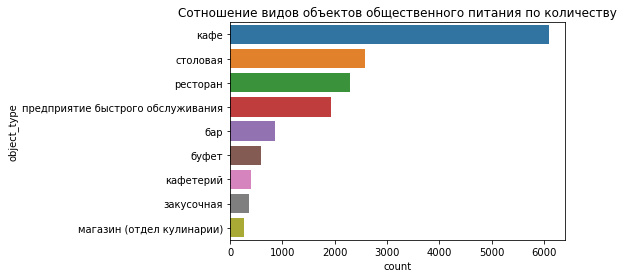

In [17]:
sns.barplot(x='count', y='object_type', data=object_type_group)
plt.title('Сотношение видов объектов общественного питания по количеству')
plt.show()

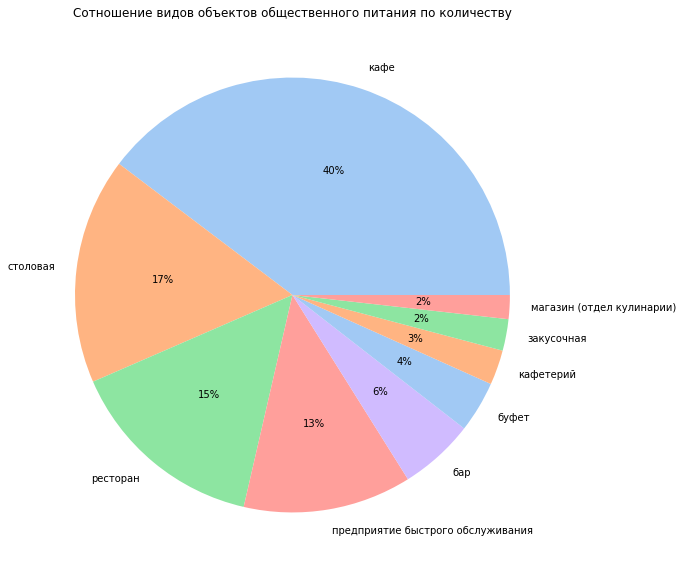

In [18]:
plt.figure(figsize=(10,10))
plt.title('Сотношение видов объектов общественного питания по количеству')
plt.pie(object_type_group['count'], labels=object_type_group['object_type'],colors = sns.color_palette('pastel')[0:5], autopct='%.0f%%')
plt.show()

<p><b>Вывод:</b>
<p>Можно заметить, что больше всего объектов общественного питания типа кафе, меньше всего типа закусочная и магазин(отдел кулинарии). Топ-5 включает: кафе, столовая, ресторан,предприятие быстрого обслуживания, бар

 ### Cоотношение сетевых и несетевых заведений по количеству. 

In [19]:
df.groupby('chain', as_index=False)['id'].count()

,chain,id
0,да,2968
1,нет,12398


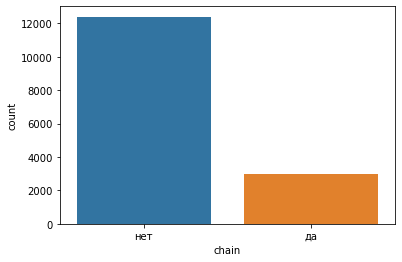

In [20]:
sns.countplot(x='chain', data=df)
plt.show()

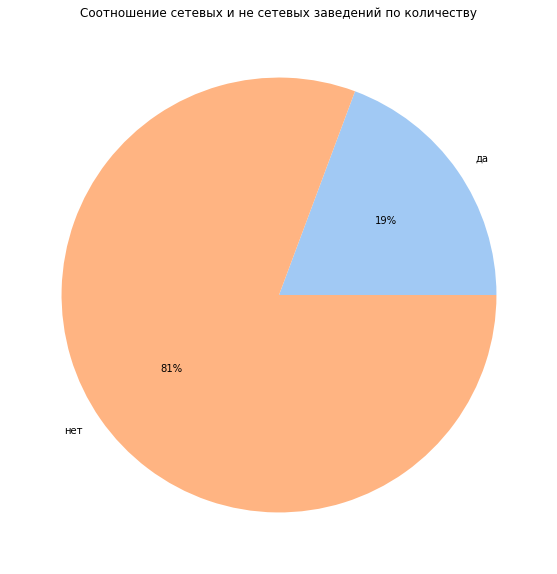

In [21]:
plt.figure(figsize=(10,10))
plt.title('Cоотношение сетевых и не сетевых заведений по количеству')
plt.pie(df.groupby('chain', as_index=False)['id'].count()['id'], labels=df.groupby('chain', as_index=False)['id'].count()['chain'],colors = sns.color_palette('pastel')[0:5], autopct='%.0f%%')
plt.show()

<p><b>Вывод:</b>
<p>Больше всего заведений не относящихся к какой-либо сети

 ### Для какого вида объекта общественного питания характерно сетевое распространение

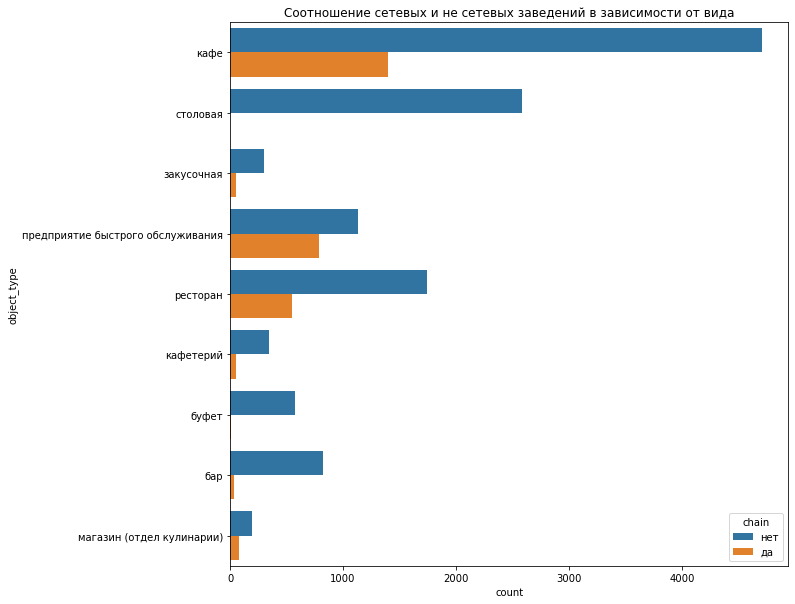

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(y='object_type', hue='chain', data=df)
plt.title('Соотношение сетевых и не сетевых заведений в зависимости от вида')
plt.show()

In [23]:
yes = df.query('chain == "да"').groupby('object_type', as_index=False)['chain'].count()
no = df.query('chain == "нет"').groupby('object_type',as_index=False)['chain'].count()
yes.merge(no, on='object_type')
chain_group = yes.merge(no, on='object_type')
chain_group['total'] = chain_group['chain_x'] + chain_group['chain_y']
chain_group = chain_group.rename(columns={'chain_x':'chain', 'chain_y':'indie'})
chain_group['chain_to_indie'] = (chain_group['chain'] / chain_group['indie']).round(2)
chain_group['chain_to_total'] = (chain_group['chain'] / chain_group['total']).round(2)
chain_group.sort_values('chain_to_indie',ascending=False)

,object_type,chain,indie,total,chain_to_indie,chain_to_total
6,предприятие быстрого обслуживания,791,1132,1923,0.70,0.41
5,магазин (отдел кулинарии),78,195,273,0.40,0.29
7,ресторан,544,1741,2285,0.31,0.24
3,кафе,1396,4703,6099,0.30,0.23
2,закусочная,56,304,360,0.18,0.16
4,кафетерий,52,346,398,0.15,0.13
0,бар,37,819,856,0.05,0.04
1,буфет,11,574,585,0.02,0.02
8,столовая,3,2584,2587,0.00,0.00


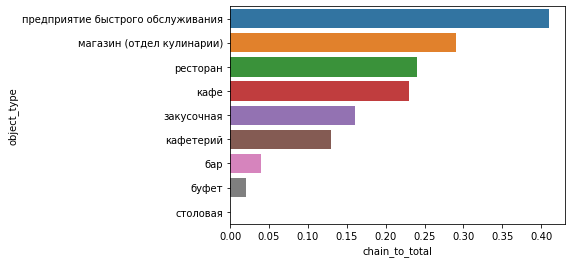

In [24]:
sns.barplot( x='chain_to_total', y='object_type', data=chain_group.sort_values('chain_to_indie',ascending=False))
plt.show()

<p><b>Вывод:</b>
<p>В абсолютном выражении больше всего сетевых заведений среди кафе. Однако, если учитывать долю несетевых заведений среди общего числа по виду, то тогда наиболее характерно сетевое распространение для предприятий быстрого обслуживания

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

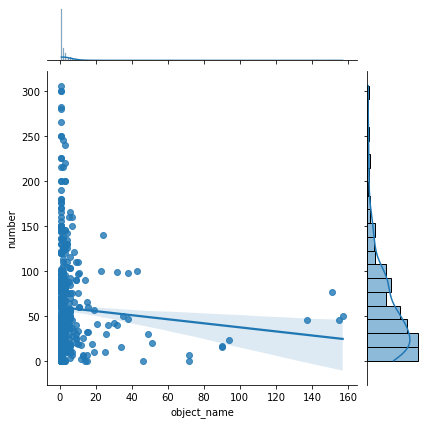

In [25]:
df.query('chain=="да"').groupby('object_name', as_index=False).agg({'object_name':'count', 'number':'median'})
sns.jointplot(x='object_name', y='number',kind='reg', data=df.query('chain=="да"').groupby('object_name', as_index=False).agg({'object_name':'count', 'number':'median'}))
plt.show()

Вывод: Чем меньше заведений в сети, тем чаще всего больше посадочных мест. И в целом харатерно не много заведений в сети с большим количеством посадочных мест.

 ### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?

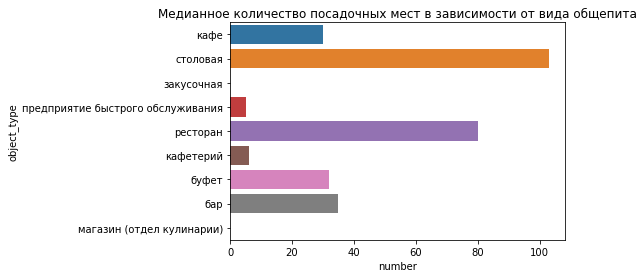

In [26]:
sns.barplot(x='number', y='object_type', data=df, ci=None, estimator=np.median )
plt.title('Медианное количество посадочных мест в зависимости от вида общепита')
plt.show()

In [27]:
df.groupby('object_type', as_index=False)['number'].median().round(2).sort_values('number', ascending=False)

,object_type,number
8,столовая,103.0
7,ресторан,80.0
0,бар,35.0
1,буфет,32.0
3,кафе,30.0
4,кафетерий,6.0
6,предприятие быстрого обслуживания,5.0
2,закусочная,0.0
5,магазин (отдел кулинарии),0.0


<p><b>Вывод:</b>
<p>В среднем самое большое количество посадочных мест наблюдается у столовых, меньше всего у магазинов(отдел кулинарии) и закусочных

### Категоризация данных

In [29]:
def get_street(data):
    split = data['address'].split(',', maxsplit=-1)
    if  len(split) > 2 and ("улица" in split[1] or "шоссе" in split[1] or "переулок" in split[1]  or 'бульвар' in split[1] or "проспект" in split[1]):
        return split[1]
    elif len(split) > 2 and ("улица" in split[2] or "шоссе" in split[2] or "переулок" in split[2]  or 'бульвар' in split[2] or "проспект" in split[2]):
        return split[2]
    elif len(split) > 3 and ("улица" in split[3] or "шоссе" in split[3] or "переулок" in split[3]  or 'бульвар' in split[3] or "проспект" in split[2]):
        return split[3]

In [30]:
df['street']=df.apply(get_street, axis=1)

In [31]:
df.head()

,id,object_name,chain,object_type,address,number,street
0,151635,Сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,Пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


### График топ-10 улиц по количеству объектов общественного питания

In [32]:
from io import BytesIO
import requests
spreadsheet_id = '12jxWK7CuSGbTDUUrIMDNlkO2UeFJoXM9gAbi0cfEIls'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
district = pd.read_csv(BytesIO(r.content))
district = district.drop('Unnamed: 0', axis=1)

In [33]:
street_top_10 = df.groupby('street', as_index=False)['id'].count().sort_values('id', ascending=False).head(10)
street_top_10

,street,id
1098,проспект Мира,204
811,Профсоюзная улица,182
542,Ленинградский проспект,171
305,Варшавское шоссе,164
545,Ленинский проспект,147
1094,проспект Вернадского,132
533,Кутузовский проспект,114
477,Каширское шоссе,112
482,Кировоградская улица,110
1017,Ходынский бульвар,102


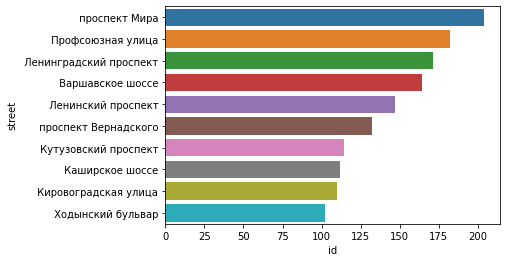

In [34]:
sns.barplot(x='id' , y='street', data=street_top_10)
plt.show()

In [35]:
df = df.merge(district[['id', 'district']], on='id')

In [36]:
df.groupby(['street'],  as_index=False)['id'].count().sort_values('id', ascending=False).head(10).merge(df[['district','street']], on='street').drop_duplicates()

,street,id,district
0,проспект Мира,204,Мещанский
15,проспект Мира,204,Останкинский
20,проспект Мира,204,Алексеевский
37,проспект Мира,204,Ростокино
79,проспект Мира,204,Свиблово
182,проспект Мира,204,Ярославский
204,Профсоюзная улица,182,Академический
212,Профсоюзная улица,182,Черёмушки
214,Профсоюзная улица,182,Обручевский
215,Профсоюзная улица,182,Коньково


In [37]:
df.groupby(['street'],  as_index=False)['id'].count().sort_values('id', ascending=False).head(10).merge(df[['district','street']], on='street').drop_duplicates()['district'].unique()

array(['Мещанский', 'Останкинский', 'Алексеевский', 'Ростокино',
       'Свиблово', 'Ярославский', 'Академический', 'Черёмушки',
       'Обручевский', 'Коньково', 'Тёплый Стан', 'Ясенево', 'Беговой',
       'Аэропорт', 'Сокол', 'Хорошёвский', 'Донской', 'Нагорный',
       'Чертаново Южное', 'Чертаново Северное', 'Чертаново Центральное',
       'Нагатино-Садовники', 'Южное Бутово', 'Воскресенское', 'Щербинка',
       'Якиманка', 'Гагаринский', 'Ломоносовский', 'Тропарёво-Никулино',
       'Проспект Вернадского', 'Раменки', 'Таганский', 'Фили-Давыдково',
       'Дорогомилово', 'Москворечье-Сабурово', 'Орехово-Борисово Южное',
       'Орехово-Борисово Северное'], dtype=object)

In [38]:
df.groupby('district', as_index=False)['id'].count().sort_values('id', ascending=False).head(10)

,district,id
118,Тверской,810
94,Пресненский,716
7,Басманный,633
29,Даниловский,468
34,Замоскворечье,390
127,Хамовники,375
117,Таганский,362
67,Мещанский,352
4,Арбат,271
130,Хорошёвский,259


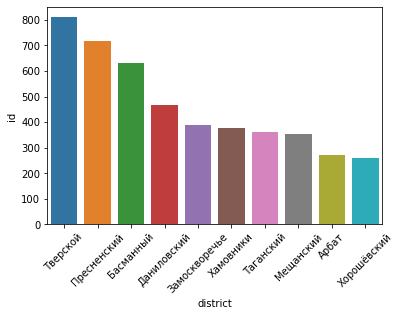

In [39]:
sns.barplot(x='district', y='id', data=df.groupby('district', as_index=False)['id'].count().sort_values('id', ascending=False).head(10))
plt.xticks(rotation=45)
plt.show()

<p><b>Вывод:</b>
<p>Выше можно увидеть таблицу в которой приведены названия улиц с самым большим количеством работающих заведений общепита и их районное расположение. Многие улицы пересекают несколько районов Москвы

### Число улиц с одним объектом общественного питания. 

In [40]:
streets_object_count = df.groupby(['street','district'],  as_index=False)['id'].count().sort_values('id', ascending=False)
streets_object_count = streets_object_count.rename(columns={'id':'count'})
streets_object_count.query('count == 1')['district'].unique() # Районы с улицами, на которых работает только одно заведение

array(['Даниловский', 'Южное Медведково', 'Таганский', 'Московский',
       'Обручевский', 'Кузьминки', 'Дорогомилово', 'Сокольники',
       'Марьино', 'Басманный', 'Некрасовка', 'Люблино', 'Тимирязевский',
       'Краснопахорское', 'Пресненский', 'Силино', 'Хорошёво-Мнёвники',
       'Рязанский', 'Щукино', 'Солнцево', 'Измайлово', 'Внуковское',
       'Нижегородский', 'Донской', 'Фили-Давыдково', 'Капотня',
       'Можайский', 'Южнопортовый', 'Хамовники', 'Кунцево',
       'Бабушкинский', 'Ярославский', 'Щаповское', 'Митино', 'Печатники',
       'Тверской', 'Южное Бутово', 'Царицыно', 'Арбат', 'Черёмушки',
       'Ясенево', 'Марьина Роща', 'Лосиноостровский', 'Рязановское',
       'Алексеевский', 'Гагаринский', 'Москворечье-Сабурово',
       'Ломоносовский', 'Северное Бутово', 'Лефортово', 'Бутырский',
       'Очаково-Матвеевское', 'Сосенское', 'Хорошёвский', 'Кокошкино',
       'Косино-Ухтомский', 'Котловка', 'Соколиная Гора',
       'Новофёдоровское', 'Десёновское', 'Крюково', 'Замо

In [41]:
streets_object_count.query('count == 1')['street'].count() # число улиц с одним объектом общественного питания

534

In [42]:
streets_object_count.query('count == 1')['street'].unique() # Улицы с одним работающим заведением общепита

array([' улица Павла Андреева', ' улица Молодцова', ' улица Высоцкого',
       ' улица Никитина', ' улица Намёткина', ' улица Шумилова',
       ' улица Можайский Вал', ' улица Шумкина', ' улица Нижние Поля',
       ' улица Новая Дорога', ' улица Недорубова', ' улица Немчинова',
       ' улица Школа-интернат', ' улица Николаева', ' улица Панфилова',
       ' улица Шеногина', ' улица Гарибальди', ' улица Паперника',
       ' улица Гамалеи', ' улица Щорса', ' шоссе Энтузиастов',
       ' улица Энгельса', ' шоссе Фрезер', ' улица Шухова',
       ' улица Пивченкова', ' улица Капотня', ' улица Генерала Ермолова',
       ' улица Саляма Адиля', ' улица Красных Зорь', ' улица Сайкина',
       ' улица Жуковского', ' улица Жебрунова', ' улица Крутицкий Вал',
       ' улица Савельева', ' улица Екатерины Будановой', ' улица Кубинка',
       ' улица Рудневой', ' улица Ротерта', ' улица Кутузова',
       ' улица Евгения Родионова', ' улица Рословка',
       ' улица Кухмистерова', ' улица Сущёвский Ва

In [46]:
street_top_10

,street,id
1098,проспект Мира,204
811,Профсоюзная улица,182
542,Ленинградский проспект,171
305,Варшавское шоссе,164
545,Ленинский проспект,147
1094,проспект Вернадского,132
533,Кутузовский проспект,114
477,Каширское шоссе,112
482,Кировоградская улица,110
1017,Ходынский бульвар,102


In [47]:
def get_category(row): # Функция для категорий конкуренции
    if row['street'] in street_top_10['street'].to_list():
        return 'hight'
    if row['street'] in streets_object_count.query('count == 1')['street'].to_list():
        return 'low'

In [48]:
df['competition'] = df.apply(get_category, axis=1)

In [49]:
df = df.merge(district[['id', 'longitude','latitude']], on='id')

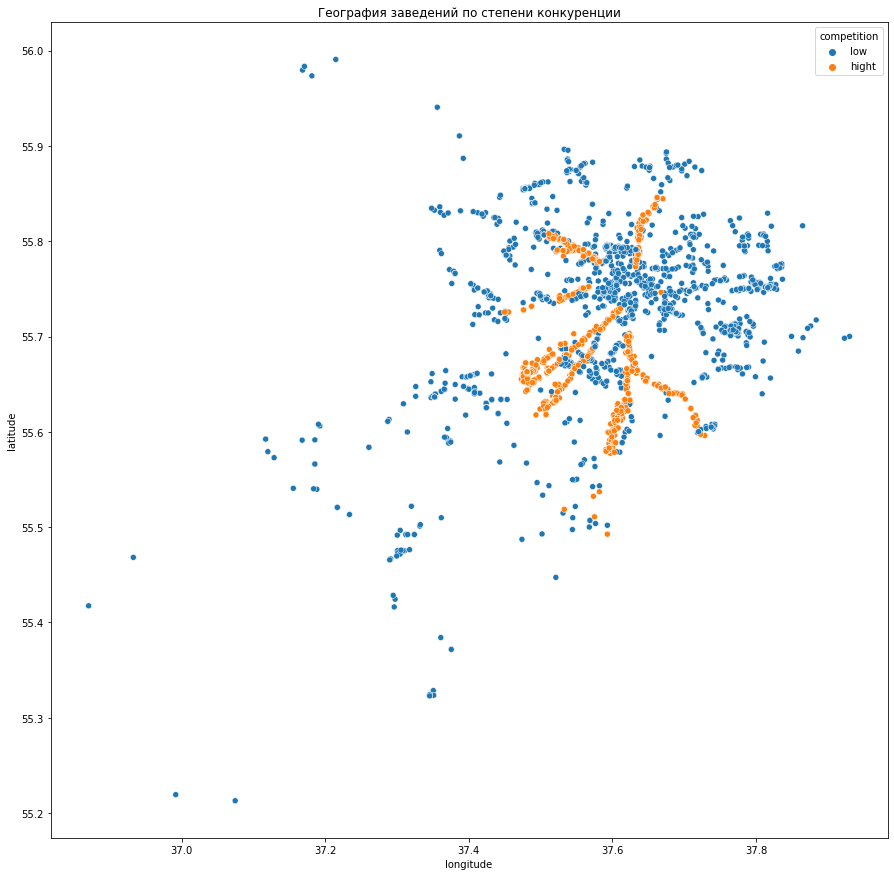

In [50]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['competition'])
plt.title('География заведений по степени конкуренции')
plt.show()

### Предварительный вывод

<p>1.На рынке больше всего объектов общественного питания представлено типом кафе, меньше всего типом закусочная и магазин(отдел кулинарии). Топ-5 включает: кафе, столовая, ресторан,предприятие быстрого обслуживания, бар
<p>2.Больше всего на рынке заведений общепита не относящихся к какой-либо сети
<p>3.Наиболее характерно сетевое распространение для предприятий быстрого обслуживания
<p>4.Для сетевых заведений характерно большое количество заведений с относительно небольшим количеством посадочных мест 
<p>5.В среднем самое большое количество посадочных мест наблюдается у столовых, меньше всего у магазинов(отдел кулинарии). Для предприятий быстрого обсуживания среднее значение посадочных мест равно 20
<p>6.Улицы на которых больше всего конкурентов это: 'проспект Мира',
 'Профсоюзная улица',
 'Ленинградский проспект',
 'Варшавское шоссе',
 'Ленинский проспект',
 'проспект Вернадского',
 'Кутузовский проспект',
 'Каширское шоссе',
 'Кировоградская улица',
 'Ходынский бульвар'
<p>7.Улиц в Москве на которых расположено только по одному объекту общественного питания 534
<p>8.На улицах с высокой конкуренцией среднее количество посадочных мест равно 56. 75% заведений имеют не более 74 посадочных мест
  <p> 9.Районы с высоким уровнем конкуренции: 'Тверской',
 'Пресненский',
 'Басманный',
 'Даниловский',
 'Замоскворечье',
 'Хамовники',
 'Таганский',
 'Мещанский',
 'Арбат',
 'Хорошёвский'

 <p> Мне кажется, что выводы могут быть не корректны по этим данным. Большие улицы, которые пересекают несколько районов естесственным образом будут показывать большое количество заведений общепита на них. Но аудитория для каждого района своя и целесообразно рассматривать скорее районы чем улицы и считать количество заведений по районам. 
 <p>  Планируется открыть небольшое кафе с перспективой на сетевое распространение, следовательно нужно рассмотреть конкурентов по этому виду общепита и степень конкуренции по районам для этого вида общепита и данного метода распространения

### Дополнительное исследование

In [51]:
df_cafe_chain = df.query('object_type == "кафе" and chain == "да"').drop(columns=['competition'])

In [52]:
df_cafe_chain['number'].describe()

count    1396.000000
mean       47.426934
std        44.731453
min         0.000000
25%        20.000000
50%        40.000000
75%        60.000000
max       456.000000
Name: number, dtype: float64

In [53]:
np.percentile(df_cafe_chain['number'], [50,95])

array([ 40., 130.])

In [54]:
df_cafe_chain_hight_competition_districts = df_cafe_chain.groupby('district', as_index=False)['id'].count().sort_values('id', ascending=False).head(10)
df_cafe_chain_hight_competition_districts

,district,id
98,Тверской,103
6,Басманный,86
28,Замоскворечье,58
75,Пресненский,58
53,Мещанский,58
3,Арбат,44
97,Таганский,44
105,Хамовники,37
4,Аэропорт,31
120,Якиманка,29


In [55]:
df_cafe_chain_low_competition_districts = df_cafe_chain.groupby('district', as_index=False)['id'].count().query('id==1')
df_cafe_chain_low_competition_districts

,district,id
12,Братеево,1
24,Десёновское,1
30,Зюзино,1
35,Косино-Ухтомский,1
48,Люблино,1
71,Первомайское,1
78,Роговское,1
80,Рязановское,1
100,Троицк,1
117,Южное Медведково,1


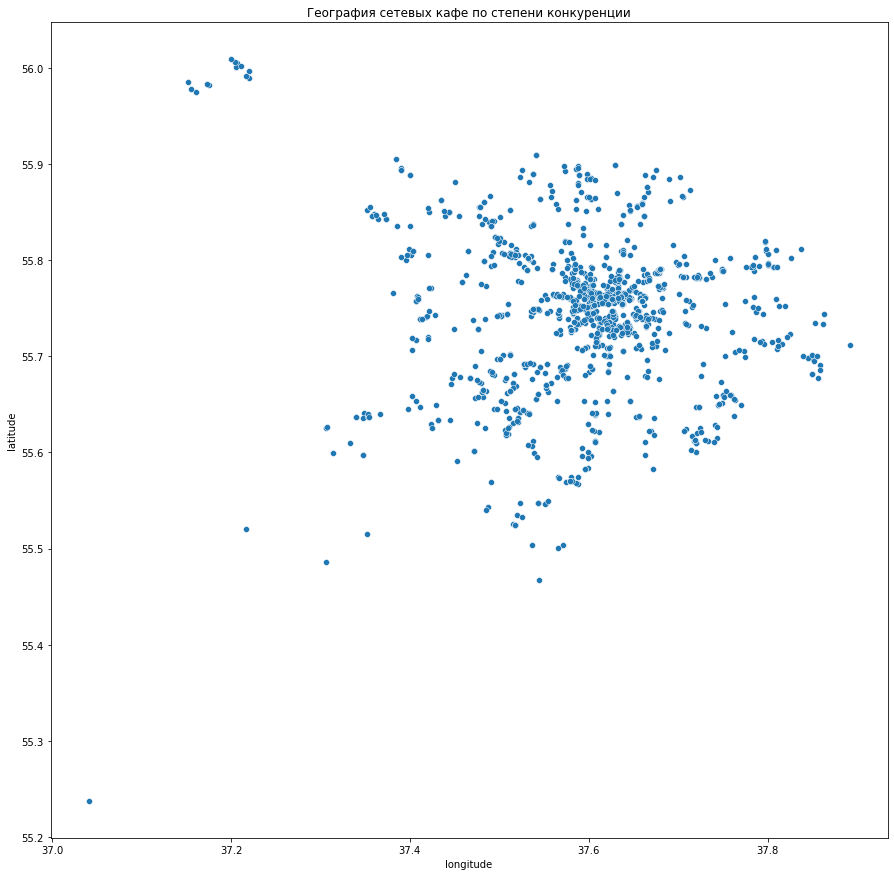

In [56]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=df_cafe_chain['longitude'], y=df_cafe_chain['latitude'])
plt.title('География сетевых кафе по степени конкуренции')
plt.show()

Логичным образом, чем ближе к центру тем выше плотность и следовательно конкуренция

Если мы все-таки хоти открыть небольшое кафе, а затем создать целую сеть, то тогда нам лучше избегать районов с высокой конкуренцией, а именно район: 'Тверской',
 'Басманный',
 'Замоскворечье',
 'Пресненский',
 'Мещанский',
 'Арбат',
 'Таганский',
 'Хамовники',
 'Аэропорт',
 'Якиманка'
 <p> Опитимальное количество поситадочных мест для кафе это 47

### Общий вывод

Если мы все таки открывает не кафе, а выбираем, что открыть то тогда рекомендации могут быть следующие:
<p>1.Если мы хотим расширяться в дальнейшем в сеть, то целесообразно открыть предприятие быстрого обслуживания так как среди них выявлено большего всего сетевых заведений, следовательно,если их много значит это рентабельно
<p>2.Тогда в начале бизнеса стоит избегать районов с высокой конкуренцией, расположенных ближе к центру Москвы. Районы с высоким уровнем конкуренции: 'Тверской', 'Пресненский', 'Басманный', 'Даниловский', 'Замоскворечье', 'Хамовники', 'Таганский', 'Мещанский', 'Арбат', 'Хорошёвский' 
<p>3.Также следует избегать улиц с высокой степенью конкуренции. Улицы на которых больше всего конкурентов это: 'проспект Мира', 'Профсоюзная улица', 'Ленинградский проспект', 'Варшавское шоссе', 'Ленинский проспект', 'проспект Вернадского', 'Кутузовский проспект', 'Каширское шоссе', 'Кировоградская улица', 'Ходынский бульвар'
<p>4.Оптимальное число посадочных мест для предприятие быстрого обслуживания = 20